# Data Science with Python

Examples will include:

• Basic Statistics

• Linear Regression

• Classification

• Clustering Wines

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline

##1. Understand your data

In [122]:
winequality_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
winequality_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [123]:
winequality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [124]:
winequality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##2. First Insights and Visualizations

In [125]:
winequality_df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [126]:
winequality_df.groupby('quality').agg({'citric acid':[np.median,np.mean],'alcohol':[min,np.mean,max]})

citric acid           alcohol                 
             median      mean     min       mean   max
quality                                               
3              0.33  0.281000     8.0  10.215000  12.6
4              0.26  0.272315     8.4  10.180093  13.5
5              0.30  0.307722     8.0   9.837783  14.9
6              0.31  0.323583     8.4  10.587553  14.0
7              0.32  0.334764     8.6  11.386006  14.2
8              0.32  0.332539     8.5  11.678756  14.0
9              0.36  0.386000    10.4  12.180000  12.9

Text(0.5, 0, 'quality')

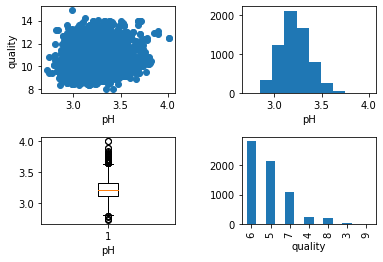

In [127]:
fig = plt.figure()
gs = gridspec.GridSpec(2,2,hspace=0.5, wspace=0.5)

ax0 = fig.add_subplot(gs[0])
ax0.scatter(winequality_df['pH'],winequality_df['alcohol'])
ax0.set_xlabel('pH')
ax0.set_ylabel('quality')

ax1 = fig.add_subplot(gs[1])
ax1.hist(winequality_df['pH'])
ax1.set_xlabel('pH')

ax2 = fig.add_subplot(gs[2])
ax2.boxplot(winequality_df['pH'])
ax2.set_xlabel('pH')


ax3 = fig.add_subplot(gs[3])
quality_cnt = winequality_df['quality'].value_counts()
quality_cnt.plot(kind='bar')
ax3.set_xlabel('quality')

##3. Univariate Linear regression

In a first step we consider the correlation matrix to inspect

In [128]:
corr_matrix = winequality_df.corr().round(2)
corr_matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04


```alcohol``` is the parameter which has the highest Correlation to the quality. Thus we could ask if the
percentage of alcohol is a good measure of quality.

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

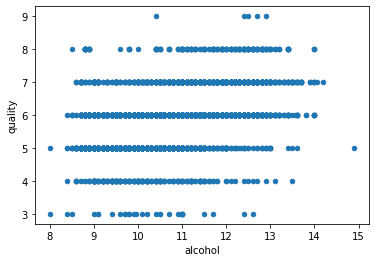

In [129]:
winequality_df.plot(kind = 'scatter', x = 'alcohol', y = 'quality')

We can fit a linear regression model on the given data. We therefor use ```LinearRegression``` from ```sklearn.linear_model```.

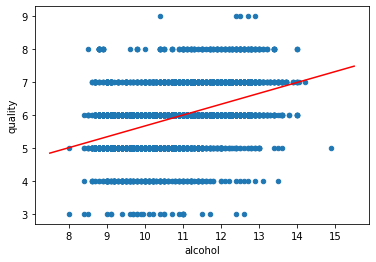

In [130]:
from sklearn.linear_model import LinearRegression #Import
from sklearn.model_selection import train_test_split

X = winequality_df[['alcohol']]
Y = winequality_df['quality']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

model = LinearRegression()                        #Instantiate
model.fit(X_train,Y_train)                        #Fit
i = model.intercept_.round(2)
c = model.coef_.round(2)
winequality_df.plot(kind = 'scatter', x = 'alcohol', y = 'quality')
x = np.linspace(7.5,15.5,100)
plt.plot(x,c*x+i,color='red')

Another example, where the correlation seem to be even better is free sulfur dioxide and total sulfur dioxide.
We could ask if it is possible to predict the total sulfur dioxide only knowing the free sulfur dioxide.

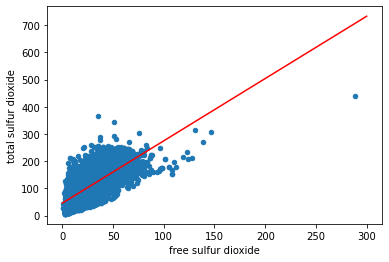

In [131]:
from sklearn.linear_model import LinearRegression #Import
from sklearn.model_selection import train_test_split

X = winequality_df[['free sulfur dioxide']]
Y = winequality_df['total sulfur dioxide']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size=0.3,random_state=1)

model2 = LinearRegression()                        #Instantiate
model2.fit(X_train2,Y_train2)                      #Fit
i = model2.intercept_.round(2)
c = model2.coef_.round(2)
winequality_df.plot(kind = 'scatter', x = 'free sulfur dioxide', y = 'total sulfur dioxide')
x = np.linspace(0,300,100)
plt.plot(x,c*x+i,color='red')

In a next step we can validate our model. We can look at the residuals to our predictions in the testing sets.

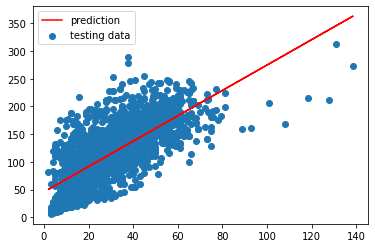

In [132]:
Y_test_predicted2 = model2.predict(X_test2)
plt.scatter(X_test2,Y_test2,label='testing data')
plt.plot(X_test2,Y_test_predicted2,color='r',label='prediction')
plt.legend()

To evaluate how much of the total variation is explained by the model we can calculate the so-called ```R-squared``` .
Therefore we use the methode ```model.score()``` on the testing sets.


In [133]:
print(model.score(X_test,Y_test))            
print(model2.score(X_test2,Y_test2))

0.1958670437347706
0.5241402588251503


Another way to evaluate a model is the ```mean_squared_error``` or if we take the square root of this value
the ```root_mean_square_error```.

In [134]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_test2,Y_test_predicted2))

1484.124265116179


## 4. Multivariate Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression #Import
from sklearn.model_selection import train_test_split

X3 = winequality_df[['free sulfur dioxide','residual sugar','volatile acidity']]
Y3 = winequality_df['total sulfur dioxide']
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3,Y3,test_size=0.3,random_state=1)

model = LinearRegression()                        #Instantiate
model.fit(X_train3,Y_train3)                      #Fit
i = model.intercept_.round(2)
c = model.coef_
print("Intercept    c=%03f" % i)
print("Coefficients a_1=%03f, a_2=%03f, a_3=%03f" % (c[0], c[1], c[2]))
print("Model Score  sc=%03f" % model.score(X_test3,Y_test3))


Intercept    c=64.090000
Coefficients a_1=1.792592, a_2=2.987701, a_3=-57.002840
Model Score  sc=0.584035


## 5. Classification
In the last sections we used linear regression to predict data. However we saw that Linear Regression isn't
very good when it comes to categorial data such as wine-quality. The Model where we tried to prescribe the quality
was much worse than the other one, where we tried to predict the total sulfur dioxide.
In this section we will have a look at classification problems whose task is to predict a discrete value.
We want to know what a good wine is really about and look at the parameters ```alcohol```,```density```,
```volatile acidity``` and ```chlorides``` as knowing the correlation matrix they seem to have a big impact on the quality
(in positive or negative sense).

In a first step we could look at a so-called multivariate plot:
We additionally first only look at the first 1000 entries.

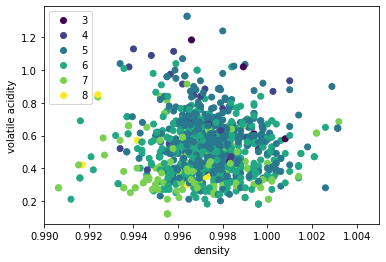

In [143]:
colors = [int(item) for item in winequality_df[:1000]['quality']]
scatter = plt.scatter(winequality_df[:1000]['density'],winequality_df[:1000]['volatile acidity'], c=colors)
plt.xlabel('density')
plt.xlim(0.99,1.005)
plt.ylabel('volatile acidity')
plt.legend(handles=scatter.legend_elements()[0],labels=range(3,10))
plt.show()

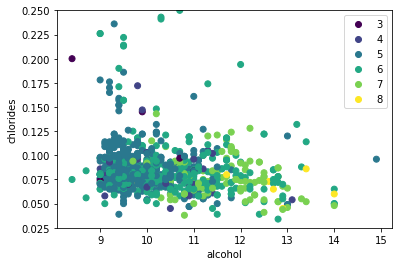

In [150]:
colors = [int(item) for item in winequality_df[:1000]['quality']]
scatter = plt.scatter(winequality_df[:1000]['alcohol'],winequality_df[:1000]['chlorides'], c=colors)
plt.xlabel('alcohol')
plt.ylabel('chlorides')
plt.ylim(0.025,0.25)
plt.legend(handles=scatter.legend_elements()[0],labels=range(3,10))
plt.show()

##6. K nearest neighbors

is a supervised machine learning model that takes a data point, looks at its 'k' closest labeled data points, 
and assigns the label by a majority vote.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
